In [1]:
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
def split_document(text, max_length=250, overlap=50):
    # Split text into words
    words = text.split()
    parts = []
    if len(words) <= max_length:
        return [text]  # Return the entire text if it's short enough

    i = 0
    while i < len(words):
        # Ensure that we don't exceed the text length
        end_index = min(i + max_length, len(words))
        # Join the selected range of words back into a string
        chunk_text = " ".join(words[i:end_index])
        parts.append(chunk_text)
        i += (max_length - overlap)
    
    return parts

In [3]:
def load_data(directory_paths):
    texts, labels = [], []
    for dialect, directory in directory_paths.items():
        for filename in os.listdir(directory):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r', encoding='latin-1') as file:
                text = file.read().strip()
                text = re.sub(r'\d+', '', text)  # Remove numbers
                
                # Apply chunking
                chunks = split_document(text)
                for chunk in chunks:
                    texts.append(chunk)
                    labels.append(dialect)  # Each chunk gets the same label as the original document

    return texts, labels


def preprocess_texts(texts):
    # Define a tokenizer function
    def tokenize(text):
        # Simple tokenization based on whitespace
        return text.split()

    # Initialize a TF-IDF Vectorizer without using stop words
    vectorizer = TfidfVectorizer(tokenizer=tokenize)
    features = vectorizer.fit_transform(texts)
    return features, vectorizer



def train_model(features, labels):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))





In [4]:

# Define your directory paths correctly
directory_paths = {
    # 'other': '../language_resources/dialects_mixed_txt/other_quechua/',
    'qub': '../language_resources/dialects_mixed_txt/qub',
    'quf': '../language_resources/dialects_mixed_txt/quf',
    'quh': '../language_resources/dialects_mixed_txt/quh',
    'quk': '../language_resources/dialects_mixed_txt/quk',
    'qul': '../language_resources/dialects_mixed_txt/qul',
    'qup': '../language_resources/dialects_mixed_txt/qup',
    'quw': '../language_resources/dialects_mixed_txt/quw',
    'qux': '../language_resources/dialects_mixed_txt/qux',
    'quy': '../language_resources/dialects_mixed_txt/quy',
    'quz': '../language_resources/dialects_mixed_txt/quz', 
    'qvc': '../language_resources/dialects_mixed_txt/qvc',
    'qve': '../language_resources/dialects_mixed_txt/qve',  
    'qvi': '../language_resources/dialects_mixed_txt/qvi',
    'qvm': '../language_resources/dialects_mixed_txt/qvm',
    'qvn': '../language_resources/dialects_mixed_txt/qvn',
    'qvo': '../language_resources/dialects_mixed_txt/qvo',
    'qvw': '../language_resources/dialects_mixed_txt/qvw',
    'qvz': '../language_resources/dialects_mixed_txt/qvz',
    'qwh': '../language_resources/dialects_mixed_txt/qwh',
    'qxl': '../language_resources/dialects_mixed_txt/qxl',
    'qxh': '../language_resources/dialects_mixed_txt/qxh',
    'qxn': '../language_resources/dialects_mixed_txt/qxn',
    'qxo': '../language_resources/dialects_mixed_txt/qxo',
    'qxr': '../language_resources/dialects_mixed_txt/qxr'
    # 'southern': '../language_resources/dialects_mixed_txt/southern_quechua'
}

texts, labels = load_data(directory_paths)
features, vectorizer = preprocess_texts(texts)

/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [5]:
print(f"Loaded {len(texts)} texts and {len(labels)} labels.")
print(f"Features shape: {features.shape}")
print(f"Number of labels: {len(labels)}")

Loaded 22546 texts and 22546 labels.
Features shape: (22546, 374925)
Number of labels: 22546


In [6]:
train_model(features, labels)

Accuracy: 0.9585365853658536
Classification Report:
               precision    recall  f1-score   support

         qub       1.00      1.00      1.00       110
         quf       1.00      1.00      1.00       127
         quh       0.84      1.00      0.91       822
         quk       1.00      0.97      0.99       151
         qul       1.00      1.00      1.00       146
         qup       1.00      1.00      1.00       151
         quw       1.00      1.00      1.00       124
         qux       0.00      0.00      0.00        68
         quy       0.98      1.00      0.99       597
         quz       1.00      0.19      0.31        97
         qvc       1.00      1.00      1.00       146
         qve       1.00      1.00      1.00       159
         qvi       1.00      1.00      1.00       130
         qvm       1.00      1.00      1.00       123
         qvn       1.00      1.00      1.00       131
         qvo       1.00      0.82      0.90       114
         qvw       1.00     

/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Accuracy: 0.9585365853658536
Classification Report:
               precision    recall  f1-score   support

         qub       1.00      1.00      1.00       110
         quf       1.00      1.00      1.00       127
         quh       0.84      1.00      0.91       822
         quk       1.00      0.97      0.99       151
         qul       1.00      1.00      1.00       146
         qup       1.00      1.00      1.00       151
         quw       1.00      1.00      1.00       124
         qux       0.00      0.00      0.00        68
         quy       0.98      1.00      0.99       597
         quz       1.00      0.19      0.31        97
         qvc       1.00      1.00      1.00       146
         qve       1.00      1.00      1.00       159
         qvi       1.00      1.00      1.00       130
         qvm       1.00      1.00      1.00       123
         qvn       1.00      1.00      1.00       131
         qvo       1.00      0.82      0.90       114
         qvw       1.00     

/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

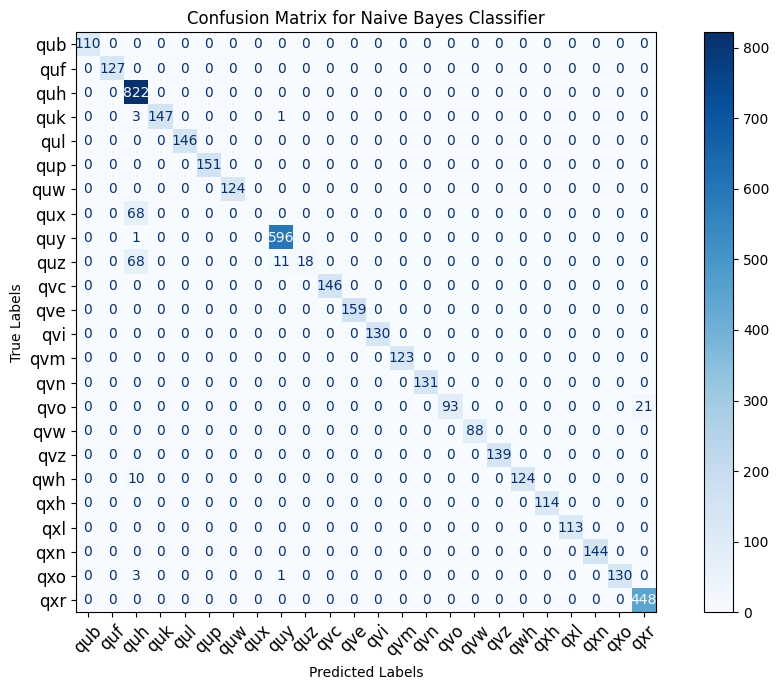

In [7]:
def train_model(features, labels):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

    # Compute and plot confusion matrix
    cm = confusion_matrix(y_test, preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    fig, ax = plt.subplots(figsize=(10, 7))  # Adjust the size as needed
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    plt.title('Confusion Matrix for Naive Bayes Classifier')
    plt.xticks(rotation=45, fontsize=12)  # Optionally adjust font size of axis labels and rotate them for better visibility
    plt.yticks(fontsize=12)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.tight_layout()  # Adjust layout

    # Change font size of the numbers inside the confusion matrix
    # for text in disp.text_:
    #     text.set_fontsize(10)

    plt.show()

train_model(features,labels)

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

# Assume 'texts' and 'labels' are loaded and preprocessed
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)
y = labels

model = MultinomialNB()
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Accuracy scores for each fold:", scores)
print("Mean cross-validation accuracy:", scores.mean())


Accuracy scores for each fold: [0.94678492 0.96185407 0.96074518 0.95919273 0.90086494]
Mean cross-validation accuracy: 0.9458883661600179


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# Assume 'texts' and 'labels' are loaded and prepared
vectorizer = TfidfVectorizer()
model = MultinomialNB()

# Create a pipeline
pipeline = make_pipeline(vectorizer, model)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, texts, labels, cv=5, scoring='accuracy')
print("CV Scores:", cv_scores)

CV Scores: [0.94745011 0.96207585 0.96141051 0.96074518 0.90796185]


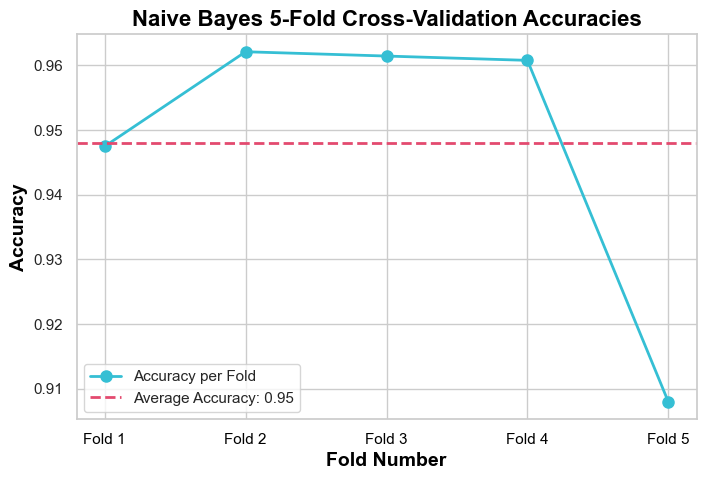

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns  # for a nicer styling

def plot_cv_scores(cv_scores):
    # Set the seaborn style for better aesthetics
    sns.set(style="whitegrid")

    fig, ax = plt.subplots(figsize=(8, 5))  # Bigger size for better readability
    ax.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='#35BFD4', markersize=8, linewidth=2, label='Accuracy per Fold')
    
    # Adding average line
    avg_score = sum(cv_scores) / len(cv_scores)
    ax.axhline(y=avg_score, color='#E34A6F', linestyle='--', linewidth=2, label=f'Average Accuracy: {avg_score:.2f}')

    # Titles and labels
    ax.set_title('Naive Bayes 5-Fold Cross-Validation Accuracies', fontsize=16, fontweight='bold', color='black')
    ax.set_xlabel('Fold Number', fontsize=14, fontweight='bold', color='black')
    ax.set_ylabel('Accuracy', fontsize=14, fontweight='bold', color='black')
    ax.set_xticks(range(1, len(cv_scores) + 1))
    ax.set_xticklabels([f"Fold {i}" for i in range(1, len(cv_scores) + 1)], color='black')

    # Adding a legend
    ax.legend(loc='lower left')

    plt.show()

plot_cv_scores(cv_scores)
